In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('cleaned_sampled_df.csv')
df.head()

,index,title,imgUrl,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,image_path
0,991285,Grevosea Bead Knotting Tool Create Secure Knot...,https://m.media-amazon.com/images/I/51s-wQHtMc...,4.2,0,11.99,0.00,1,False,100,Beading & Jewelry Making,Product_images_sampled\991285.jpg
1,310351,100Pcs 10Colors Rhinestone Tiny Cross Charms A...,https://m.media-amazon.com/images/I/71jHQaK-Ip...,0.0,0,7.99,0.00,1,False,0,Beading & Jewelry Making,Product_images_sampled\310351.jpg
2,991216,"xTool Laser Material Explore Kit, 8 Kinds of L...",https://m.media-amazon.com/images/I/716e-lvSZD...,4.8,0,119.99,139.99,1,False,50,Beading & Jewelry Making,Product_images_sampled\991216.jpg
3,882217,PAXCOO 473Pcs Stone Jewelry Making Kit Crystal...,https://m.media-amazon.com/images/I/81sV34TgRm...,4.5,0,19.99,0.00,1,False,300,Beading & Jewelry Making,Product_images_sampled\882217.jpg
4,991708,52pcs Random Antique Silver Day Of The Dead Ha...,https://m.media-amazon.com/images/I/71cS9nPMxs...,4.8,0,7.99,0.00,1,False,50,Beading & Jewelry Making,Product_images_sampled\991708.jpg


In [3]:
df = df.drop(['imgUrl'],axis = 1)
df.head()

,index,title,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name,image_path
0,991285,Grevosea Bead Knotting Tool Create Secure Knot...,4.2,0,11.99,0.00,1,False,100,Beading & Jewelry Making,Product_images_sampled\991285.jpg
1,310351,100Pcs 10Colors Rhinestone Tiny Cross Charms A...,0.0,0,7.99,0.00,1,False,0,Beading & Jewelry Making,Product_images_sampled\310351.jpg
2,991216,"xTool Laser Material Explore Kit, 8 Kinds of L...",4.8,0,119.99,139.99,1,False,50,Beading & Jewelry Making,Product_images_sampled\991216.jpg
3,882217,PAXCOO 473Pcs Stone Jewelry Making Kit Crystal...,4.5,0,19.99,0.00,1,False,300,Beading & Jewelry Making,Product_images_sampled\882217.jpg
4,991708,52pcs Random Antique Silver Day Of The Dead Ha...,4.8,0,7.99,0.00,1,False,50,Beading & Jewelry Making,Product_images_sampled\991708.jpg


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24502 entries, 0 to 24501
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              24502 non-null  int64  
 1   title              24502 non-null  object 
 2   stars              24502 non-null  float64
 3   reviews            24502 non-null  int64  
 4   price              24502 non-null  float64
 5   listPrice          24502 non-null  float64
 6   category_id        24502 non-null  int64  
 7   isBestSeller       24502 non-null  bool   
 8   boughtInLastMonth  24502 non-null  int64  
 9   category_name      24502 non-null  object 
 10  image_path         24502 non-null  object 
dtypes: bool(1), float64(3), int64(4), object(3)
memory usage: 1.9+ MB


LABEL ENCODING THE TARGET LABELS SO THAT THEY FALL IN THE [0,248] RANGE

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_id'] = le.fit_transform(df['category_id'])

print(f"Unique categories: {df['category_id'].unique()}")

Unique categories: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241

In [ ]:
# Assuming your dataframe is named df and has 'category_id' and 'category_name' columns
class_mapping = dict(zip(df['category_id'], df['category_name']))

# Check the first few entries in the class mapping
for category_id, category_name in list(class_mapping.items())[:10]:
    print(f"{category_id}: {category_name}")

In [15]:
import os
import shutil
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch

IMAGE_SIZE = (224,224)
BATCH_SIZE = 32

# Split the data into train, validation and test sets
train_df, temp_df  = train_test_split(df, test_size=0.3, stratify= df['category_name'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify= temp_df['category_name'], random_state=42)

class ProductDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
    
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image_path = row['image_path']
        label = row['category_id']

        # Convert the image to RGB format when opening
        image = Image.open(image_path).convert('RGB')

        if self.transform:
            image = self.transform(image)
        
        return image, label

# Image transformations
transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


# Create the datasets and dataloaders
train_dataset = ProductDataset(train_df, transform=transform)
val_dataset = ProductDataset(val_df, transform=transform)
test_dataset = ProductDataset(test_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True,drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Train samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")



Train samples: 17151
Validation samples: 3675
Test samples: 3676


Label: 193


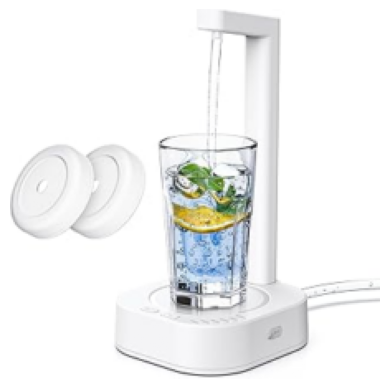

In [16]:
# Visualising an image
import matplotlib.pyplot as plt

def imshow(image):
    image = image.numpy().transpose((1, 2, 0))
    image = image * 0.5 + 0.5
    plt.imshow(image)
    plt.axis('off')
    plt.show()

example_image , example_label = train_dataset[0]

print(f"Label: {example_label}")
imshow(example_image)

In [ ]:
num_classes = df['category_id'].nunique()
print(f"Number of classes: {num_classes}")

Model definition

In [ ]:
import torch.nn as nn
import torch.optim as optim

class CNNModel(nn.Module):
    def __init__(self, num_classes = 248):
        super(CNNModel, self).__init__()

        # 3 input channels (RGB), 32 output channels, 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2,2)

        # 128 * 16 * 16 input features, 512 output features
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


num_classes = len(df['category_id'].unique())

model = CNNModel(num_classes = num_classes)



In [25]:
for i, (image, labels) in enumerate(train_loader):
    print(f"Image type: {type(image)}, Labels type: {type(labels)}")
    print(f"Image shape: {image.shape}, Labels shape: {labels.shape}")
    break

print(labels[0])

Image type: <class 'torch.Tensor'>, Labels type: <class 'torch.Tensor'>
Image shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
tensor(235)


TRAINING LOOP

In [26]:
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.device_count())  # Should be >= 1
print(torch.cuda.current_device())  # Should return a valid device index (e.g., 0)
print(torch.cuda.get_device_name(0)) 

True
1
0
NVIDIA GeForce RTX 4060 Laptop GPU


In [27]:
device = torch.device('cuda')
model = model.to(device)

In [28]:
print(f"Unique labels in batch: {torch.unique(labels)}")


Unique labels in batch: tensor([  0,   4,  16,  17,  20,  31,  36,  48,  64,  66,  69,  76,  85,  88,
         94, 102, 124, 130, 142, 171, 172, 178, 195, 196, 197, 198, 199, 227,
        235, 239, 240])


Epoch 1/15: 100%|██████████| 535/535 [01:32<00:00,  5.79it/s]


Epoch 1/15 - Loss: 1.3396007915245038


Epoch 2/15: 100%|██████████| 535/535 [01:31<00:00,  5.83it/s]


Epoch 2/15 - Loss: 0.6687439877713952


Epoch 3/15: 100%|██████████| 535/535 [02:16<00:00,  3.92it/s]


Epoch 3/15 - Loss: 0.5473641406640272


Epoch 4/15: 100%|██████████| 535/535 [05:09<00:00,  1.73it/s]


Epoch 4/15 - Loss: 0.4410092977406544


Epoch 5/15: 100%|██████████| 535/535 [01:33<00:00,  5.72it/s]


Epoch 5/15 - Loss: 0.3438460843254612


Epoch 6/15: 100%|██████████| 535/535 [01:38<00:00,  5.42it/s]


Epoch 6/15 - Loss: 0.29609460518521336


Epoch 7/15: 100%|██████████| 535/535 [01:33<00:00,  5.71it/s]


Epoch 7/15 - Loss: 0.23935896210137442


Epoch 8/15: 100%|██████████| 535/535 [01:33<00:00,  5.75it/s]


Epoch 8/15 - Loss: 0.22881853817526912


Epoch 9/15: 100%|██████████| 535/535 [01:33<00:00,  5.72it/s]


Epoch 9/15 - Loss: 0.1805462276998246


Epoch 10/15: 100%|██████████| 535/535 [01:32<00:00,  5.78it/s]


Epoch 10/15 - Loss: 0.18355393288842028


Epoch 11/15: 100%|██████████| 535/535 [01:39<00:00,  5.39it/s]


Epoch 11/15 - Loss: 0.16836541830714374


Epoch 12/15: 100%|██████████| 535/535 [01:32<00:00,  5.79it/s]


Epoch 12/15 - Loss: 0.1494943660509307


Epoch 13/15: 100%|██████████| 535/535 [01:32<00:00,  5.76it/s]


Epoch 13/15 - Loss: 0.1366668472344368


Epoch 14/15: 100%|██████████| 535/535 [01:32<00:00,  5.80it/s]


Epoch 14/15 - Loss: 0.13630785189111222


Epoch 15/15: 100%|██████████| 535/535 [01:36<00:00,  5.54it/s]


Epoch 15/15 - Loss: 0.13578873619044995


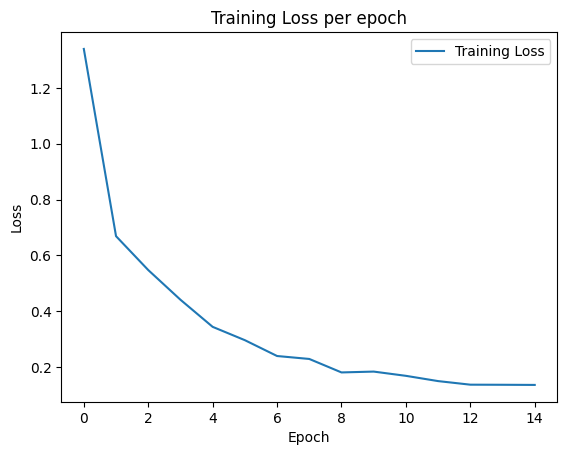

In [32]:
from tqdm import tqdm
import matplotlib.pyplot as plt

criteria = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_epochs = 15

loss_history = []

for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()
    running_loss = 0.0

    for i, (image, labels) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
        image, labels = image.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(image)

        loss = criteria(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    loss_history.append(epoch_loss)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss/len(train_loader)}")

plt.plot(range(num_epochs), loss_history, label = 'Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss per epoch')
plt.show()

In [40]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

def evaluate_model(model, data_loader, device, class_mapping=None):
    model.eval()  # Set the model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)  # Get class predictions
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(all_labels, all_preds)
    print(f"Accuracy: {accuracy:.4f}")

    # Optionally, display a classification report
    # if class_mapping:
    #     # print(classification_report(all_labels, all_preds, target_names=class_mapping.values()))
    # else:
    #     # print(classification_report(all_labels, all_preds))

    # return accuracy

# Evaluate on validation set
print("Validation Set Evaluation:")
val_accuracy = evaluate_model(model, val_loader, device)

# Evaluate on test set
print("\nTest Set Evaluation:")
test_accuracy = evaluate_model(model, test_loader, device)


Validation Set Evaluation:
Accuracy: 0.0596

Test Set Evaluation:
Accuracy: 0.0615


In [41]:
from sklearn.metrics import f1_score

val_preds = []
val_true = []

for inputs, labels in val_loader:
    # Forward pass
    outputs = model(inputs.to(device))
    _, preds = torch.max(outputs, 1)

    val_preds.extend(preds.cpu().numpy())
    val_true.extend(labels.cpu().numpy())

f1 = f1_score(val_true, val_preds, average='weighted')
print(f"F1-score: {f1}")

F1-score: 0.05880834353429983


In [34]:
# Assuming your dataframe is named df and has 'category_id' and 'category_name' columns
class_mapping = dict(zip(df['category_id'], df['category_name']))

# Check the first few entries in the class mapping
for category_id, category_name in list(class_mapping.items())[:10]:
    print(f"{category_id}: {category_name}")

0: Beading & Jewelry Making
1: Fabric Decorating
2: Knitting & Crochet Supplies
3: Printmaking Supplies
4: Scrapbooking & Stamping Supplies
5: Sewing Products
6: Craft & Hobby Fabric
7: Needlework Supplies
8: Arts, Crafts & Sewing Storage
9: Painting, Drawing & Art Supplies


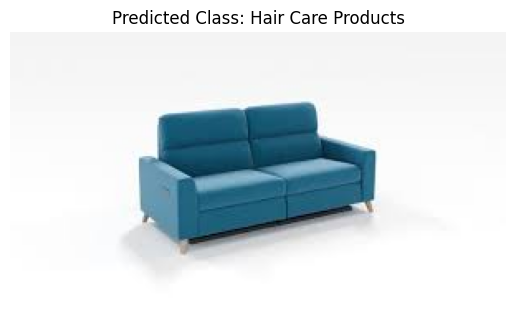

Predicted Class: Hair Care Products


In [39]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms

# Load and preprocess the image
img_path = 'unseen_images/3.jpeg'  # Replace with your image path
img = Image.open(img_path)

# Define the transformation to preprocess the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the expected input size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize using ImageNet values
])

# Apply transformations
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

# Move the image to the same device as the model
img_tensor = img_tensor.to(device)

# Get the prediction
model.eval()
with torch.no_grad():
    output = model(img_tensor)
    _, predicted_label = torch.max(output, 1)

# Map the predicted label to the corresponding category name
predicted_class = class_mapping[predicted_label.item()]

# Plot the image and the prediction
plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

print(f"Predicted Class: {predicted_class}")


In [42]:
import torch

# Define the path where you want to save the model
model_save_path = "weak_cnn_model_state_dict.pth"

# Save the model's state dictionary
torch.save(model.state_dict(), model_save_path)

print(f"Model's state dictionary saved to {model_save_path}")


Model's state dictionary saved to weak_cnn_model_state_dict.pth
